### **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pycaret
pd.options.display.max_rows = 20
import warnings
warnings.filterwarnings('ignore')

## **Etapa 1: Entender los Datos**

In [2]:
Data_final = pd.read_csv('./Datos/Income.csv')
Data_final.dropna(inplace=True)

In [3]:
Data_final.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
Data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40727 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40727 non-null  int64 
 1   workclass        40727 non-null  object
 2   fnlwgt           40727 non-null  int64 
 3   education        40727 non-null  object
 4   educational-num  40727 non-null  int64 
 5   marital-status   40727 non-null  object
 6   occupation       40727 non-null  object
 7   relationship     40727 non-null  object
 8   race             40727 non-null  object
 9   gender           40727 non-null  object
 10  capital-gain     40727 non-null  int64 
 11  capital-loss     40727 non-null  int64 
 12  hours-per-week   40727 non-null  int64 
 13  native-country   40727 non-null  object
 14  income_>50K      40727 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


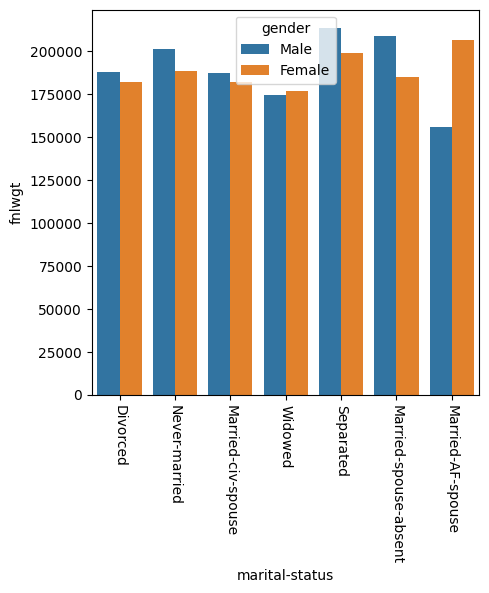

In [20]:
fig,ax = plt.subplots(1,sharex=True,figsize=(5,5))
ax = sns.barplot(Data_final,x ='marital-status',y='fnlwgt', hue='gender',errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
plt.show()

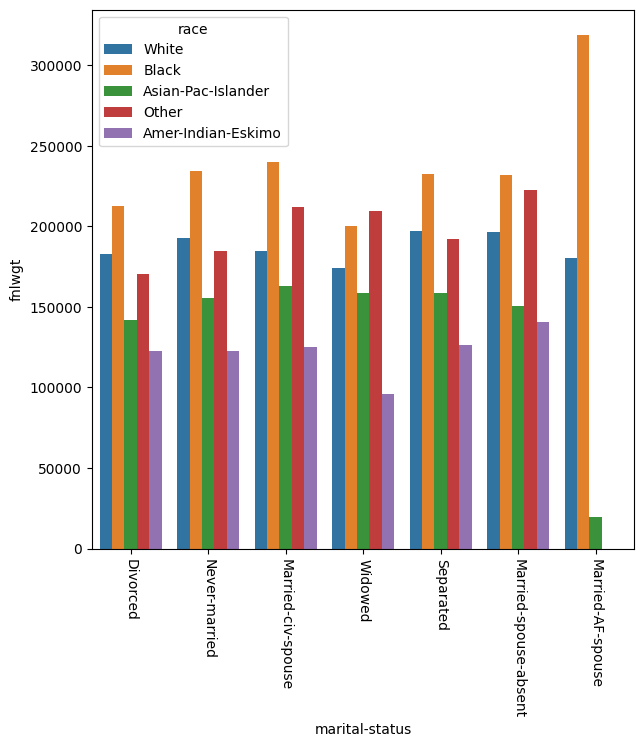

In [22]:
fig,ax = plt.subplots(1,sharex=True,figsize=(7,7))
ax = sns.barplot(Data_final,x ='marital-status',y='fnlwgt', hue='race',errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
plt.show()

In [ ]:
X = Data_final[['Poblacion', 'ECI', 'año_x', 'Ecuador']]
Y = Data_final['total_gdp_million']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

### ***Revisar Multicolinealidad***

In [ ]:
variables = Data_final.drop(columns=['Pais_x'])
vif_data = pd.DataFrame()
vif_data["Variable"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [ ]:
print("\nVIF:")
print(vif_data)


VIF:
            Variable       VIF
0          Poblacion  1.781558
1  total_gdp_million  2.157813
2                ECI  1.609753
3              año_x  2.499387
4            Ecuador  2.434782


Existe multicolinealidad leve entre los datos entre los datos, por lo que no necesariamente se debe eliminarla pues al ser una multicolinalidad moderada el modelo de regresion lineal puede seguir haciendo predicciones de manera correcta

### ***Revisar Autocorrelacion***

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics import tsaplots
from statsmodels.stats.stattools import durbin_watson

In [ ]:
X = np.array(Data_final.ECI)

In [ ]:
sm.tsa.acf (X)

array([ 1.        ,  0.93415228,  0.8822679 ,  0.83326927,  0.77894522,
        0.73213627,  0.68247589,  0.63280588,  0.58410197,  0.53776899,
        0.48695291,  0.43925635,  0.38624893,  0.33911762,  0.29653167,
        0.25193233,  0.20665067,  0.16616246,  0.12236616,  0.07985138,
        0.0391977 , -0.00415941, -0.00252875,  0.00209584,  0.00827472,
        0.0129243 ,  0.01555542,  0.02091416,  0.02548139,  0.03079507,
        0.03464726,  0.03835648])

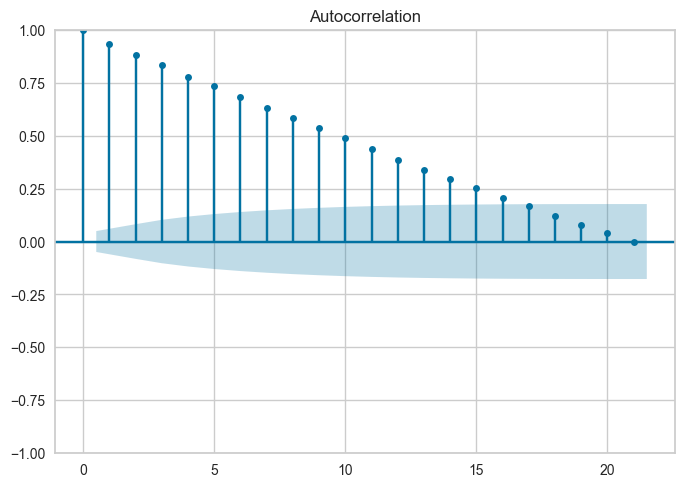

In [ ]:
fig = tsaplots.plot_acf(X,lags=21)
plt.show ()

In [ ]:
model_1 = ols('total_gdp_million ~ Poblacion + ECI + Ecuador', data=Data_final).fit()
durbin_watson(model_1.resid)

0.28431927577944044

In [ ]:
model_2 = ols('total_gdp_million ~ Poblacion + Ecuador ', data=Data_final).fit()
durbin_watson(model_2.resid)

0.273151820843164

In [ ]:
model_3 = ols('total_gdp_million ~ ECI + Ecuador ', data=Data_final).fit()
durbin_watson(model_3.resid)

0.18004463173935156

* En este caso se observa que el modelo muestra autocorrelacion pues se trata de Datos de panel los cuales tienen una componente temporal, en este caso la prueba de DurbiWatson para los 3 modelos arroja el valor de ***ρ*** cercado a 0 [0.28,0.27,1.8] entrando en el rango de 0<***ρ***<1 dando un DW = 2 (Durbin Watson) dando como resultado que el dataset tiene autocorrelacion positiva , lo que se refuerza al ver la grafica la cual solo en el rezago 21 tiene autocorrelacion de 0, mietras que a lo largo de la grafica siempre se observo que la autocorrelacion fue bajando pocco a poco.

* El problema de que exista autocorrelacion es que el modelo al usar regresion lineal tendra problemas a la hora ajsutar el modelo pues puede generar un Coeficiente de Determinacion muy perfecto R<sup>2</sup>=1, lo que haria que existe overfitting en el modelo imposibilidanto la generalizacion de los datos.


### ***Eliminar Autocorrelacion***

## **Etapa 3: Crear y Evaluar Modelos con Pycaret**

### ***Data***

In [ ]:
std = StandardScaler()
std.fit(Data_final[['total_gdp_million']])
Data_final['total_gdp_million']= std.transform(Data_final[['total_gdp_million']])
std.fit(Data_final[['Poblacion']])
Data_final['Poblacion']= std.transform(Data_final[['Poblacion']])
Data_final.drop(columns=['Pais_x'],axis=1,inplace =True)
Data_final

,Poblacion,total_gdp_million,ECI,año_x,Ecuador
0,-0.123399,-0.283150,-1.042459,2019,0
1,-0.119818,-0.305020,-1.206390,2020,0
2,-0.180644,-0.378758,-1.064802,2000,0
3,-0.178598,-0.378796,-0.804064,2001,0
4,-0.176565,-0.377148,-0.994074,2002,0
...,...,...,...,...,...
1570,-0.270800,-0.418356,-0.342388,2002,1
1571,-0.271153,-0.418000,-0.393783,2001,1
1572,-0.271519,-0.418072,-0.288579,2000,1
1573,-0.267464,-0.415640,-0.381771,2009,1


In [ ]:
reg = setup(Data_final, target = 'total_gdp_million', session_id = 123,remove_multicollinearity=True)

,Description,Value
0,Session id,123
1,Target,total_gdp_million
2,Target type,Regression
3,Original data shape,"(1575, 5)"
4,Transformed data shape,"(1575, 5)"
5,Transformed train set shape,"(1102, 5)"
6,Transformed test set shape,"(473, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# exp.setup(Data_final, target = 'total_gdp_million', session_id = 123,use_gpu=False)

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0444,0.0154,0.1054,0.9853,0.0451,0.3794,0.0190
rf,Random Forest Regressor,0.0776,0.0856,0.2196,0.9183,0.0768,0.4537,0.0270
gbr,Gradient Boosting Regressor,0.1229,0.0815,0.2457,0.9133,0.1087,0.9615,0.0130
lightgbm,Light Gradient Boosting Machine,0.1106,0.1099,0.2921,0.8975,0.1007,0.7146,0.1090
dt,Decision Tree Regressor,0.0963,0.1424,0.3113,0.8301,0.1054,0.5288,0.0060
ada,AdaBoost Regressor,0.3741,0.2601,0.4837,0.6442,0.2147,2.5735,0.0110
br,Bayesian Ridge,0.4093,0.5629,0.7271,0.3295,0.2671,3.2042,0.0040
ridge,Ridge Regression,0.4098,0.5630,0.7273,0.3284,0.2671,3.2143,0.1360
lar,Least Angle Regression,0.4099,0.5631,0.7274,0.3282,0.2671,3.2167,0.0050
lr,Linear Regression,0.4099,0.5631,0.7274,0.3282,0.2671,3.2167,0.2080


In [ ]:
reg = setup(Data_final, target = 'total_gdp_million', session_id = 123,remove_multicollinearity=False)

,Description,Value
0,Session id,123
1,Target,total_gdp_million
2,Target type,Regression
3,Original data shape,"(1575, 5)"
4,Transformed data shape,"(1575, 5)"
5,Transformed train set shape,"(1102, 5)"
6,Transformed test set shape,"(473, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0444,0.0154,0.1054,0.9853,0.0451,0.3794,0.0190
rf,Random Forest Regressor,0.0776,0.0856,0.2196,0.9183,0.0768,0.4537,0.0280
gbr,Gradient Boosting Regressor,0.1229,0.0815,0.2457,0.9133,0.1087,0.9615,0.0140
lightgbm,Light Gradient Boosting Machine,0.1106,0.1099,0.2921,0.8975,0.1007,0.7146,0.1240
dt,Decision Tree Regressor,0.0963,0.1424,0.3113,0.8301,0.1054,0.5288,0.0050
ada,AdaBoost Regressor,0.3741,0.2601,0.4837,0.6442,0.2147,2.5735,0.0110
br,Bayesian Ridge,0.4093,0.5629,0.7271,0.3295,0.2671,3.2042,0.0040
ridge,Ridge Regression,0.4098,0.5630,0.7273,0.3284,0.2671,3.2143,0.0040
lar,Least Angle Regression,0.4099,0.5631,0.7274,0.3282,0.2671,3.2167,0.0040
lr,Linear Regression,0.4099,0.5631,0.7274,0.3282,0.2671,3.2167,0.0050


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### ***Data No Autocorrelation***

In [ ]:
std = StandardScaler()
Data_final

,Poblacion,total_gdp_million,ECI,año_x,Ecuador
0,-0.123399,-0.283150,-1.042459,2019,0
1,-0.119818,-0.305020,-1.206390,2020,0
2,-0.180644,-0.378758,-1.064802,2000,0
3,-0.178598,-0.378796,-0.804064,2001,0
4,-0.176565,-0.377148,-0.994074,2002,0
...,...,...,...,...,...
1570,-0.270800,-0.418356,-0.342388,2002,1
1571,-0.271153,-0.418000,-0.393783,2001,1
1572,-0.271519,-0.418072,-0.288579,2000,1
1573,-0.267464,-0.415640,-0.381771,2009,1


In [ ]:
# Data_final = Data_final[Data_final['año_x']==2020]
# Data_final

In [ ]:
std.fit(Data_final[['total_gdp_million']])
Data_final['total_gdp_million']= std.transform(Data_final[['total_gdp_million']])
std.fit(Data_final[['Poblacion']])
Data_final['Poblacion']= std.transform(Data_final[['Poblacion']])
Data_final

,Poblacion,total_gdp_million,ECI,año_x,Ecuador
0,-0.123399,-0.283150,-1.042459,2019,0
1,-0.119818,-0.305020,-1.206390,2020,0
2,-0.180644,-0.378758,-1.064802,2000,0
3,-0.178598,-0.378796,-0.804064,2001,0
4,-0.176565,-0.377148,-0.994074,2002,0
...,...,...,...,...,...
1570,-0.270800,-0.418356,-0.342388,2002,1
1571,-0.271153,-0.418000,-0.393783,2001,1
1572,-0.271519,-0.418072,-0.288579,2000,1
1573,-0.267464,-0.415640,-0.381771,2009,1


In [ ]:
# from pmdarima import auto_arima 
# from statsmodels.tsa.statespace.sarimax import SARIMAX 
# stepwise_fit = auto_arima(Data_final['total_gdp_million'], start_p = 1, start_q = 1, 
#                           max_p = 3, max_q = 3, m = 12, 
#                           start_P = 0, seasonal = True, 
#                           d = None, D = 1, trace = True, 
#                           error_action ='ignore',
#                           suppress_warnings = True,   
#                           stepwise = True)
# stepwise_fit.summary() 

In [ ]:
# model = SARIMAX(Data_final['total_gdp_million'],  
#                 order = (0, 1, 1),  
#                 seasonal_order =(2, 1, 1, 12)) 
  
# result = model.fit() 

In [ ]:
# result

In [ ]:
train = Data_final[Data_final['año_x'] < 2019]
test = Data_final[Data_final['año_x'] >= 2019]
print(train.shape)
print(test.shape)

(1425, 5)
(150, 5)


In [ ]:
# B = setup(data = Data_final, target ='total_gdp_million', session_id = 123)

In [ ]:
A = setup(data = train, test_data = test,target ='total_gdp_million',fold_strategy = 'timeseries',
          ignore_features=['Pais_x','Seires'],fold = 3, session_id = 123,
          data_split_shuffle=False,fold_shuffle=False)

,Description,Value
0,Session id,123
1,Target,total_gdp_million
2,Target type,Regression
3,Original data shape,"(1575, 5)"
4,Transformed data shape,"(1575, 5)"
5,Transformed train set shape,"(1425, 5)"
6,Transformed test set shape,"(150, 5)"
7,Ignore features,2
8,Numeric features,4
9,Preprocess,True


In [ ]:
# exp.setup(data = train, test_data = test,target ='total_gdp_million',fold_strategy = 'timeseries',
#           ignore_features=['Pais_x','Seires'],fold = 2, session_id = 123,
#           data_split_shuffle=False,fold_shuffle=False)

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.2954,0.5103,0.5273,0.1920,0.2490,2.8332,0.0133
par,Passive Aggressive Regressor,0.3403,0.5655,0.5790,-0.1167,0.2332,1.9777,0.0100
knn,K Neighbors Regressor,0.3554,0.8224,0.6651,-0.2641,0.2805,3.8425,0.0167
et,Extra Trees Regressor,0.2899,0.4111,0.5414,-0.6508,0.2242,2.4458,0.0367
gbr,Gradient Boosting Regressor,0.3171,0.4512,0.5940,-0.9937,0.2616,3.1799,0.0400
br,Bayesian Ridge,0.4613,0.6196,0.6677,-1.1139,0.2854,5.3954,0.0067
ridge,Ridge Regression,0.4625,0.6223,0.6693,-1.1247,0.2859,5.4206,0.0100
lar,Least Angle Regression,0.4629,0.6235,0.6698,-1.1270,0.2859,5.4284,0.0067
lr,Linear Regression,0.4629,0.6235,0.6698,-1.1270,0.2859,5.4284,0.0067
en,Elastic Net,0.4775,0.5378,0.6374,-1.2328,0.3145,2.4720,0.0100


#### **Modelo 2**

In [ ]:
Data_final_2 = Data_final.copy()
Data_final_2.drop(columns=['ECI'],axis=1,inplace =True)
train = Data_final_2[Data_final_2['año_x'] < 2019]
test = Data_final_2[Data_final_2['año_x'] >= 2019]
print(train.shape)
print(test.shape)

(1425, 4)
(150, 4)


In [ ]:
Data_final_2

,Poblacion,total_gdp_million,año_x,Ecuador
0,-0.123399,-0.283150,2019,0
1,-0.119818,-0.305020,2020,0
2,-0.180644,-0.378758,2000,0
3,-0.178598,-0.378796,2001,0
4,-0.176565,-0.377148,2002,0
...,...,...,...,...
1570,-0.270800,-0.418356,2002,1
1571,-0.271153,-0.418000,2001,1
1572,-0.271519,-0.418072,2000,1
1573,-0.267464,-0.415640,2009,1


In [ ]:
B = setup(data = train, test_data = test,target ='total_gdp_million',fold_strategy = 'timeseries',
          ignore_features=['Pais_x','Seires'],fold = 3, session_id = 123,
          data_split_shuffle=False,fold_shuffle=False)

,Description,Value
0,Session id,123
1,Target,total_gdp_million
2,Target type,Regression
3,Original data shape,"(1575, 4)"
4,Transformed data shape,"(1575, 4)"
5,Transformed train set shape,"(1425, 4)"
6,Transformed test set shape,"(150, 4)"
7,Ignore features,2
8,Numeric features,3
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.3209,0.5628,0.5748,-0.0809,0.2579,3.5187,0.0133
par,Passive Aggressive Regressor,0.3404,0.5657,0.5792,-0.1184,0.2331,1.9897,0.0100
en,Elastic Net,0.4810,0.5411,0.6411,-1.2997,0.3137,2.4987,0.0100
br,Bayesian Ridge,0.4851,0.7022,0.7147,-1.6090,0.2922,3.8887,0.0067
ridge,Ridge Regression,0.4868,0.7049,0.7168,-1.6370,0.2925,3.9096,0.0067
lr,Linear Regression,0.4874,0.7059,0.7176,-1.6470,0.2927,3.9173,0.0100
lar,Least Angle Regression,0.4874,0.7059,0.7176,-1.6470,0.2927,3.9173,0.0067
llar,Lasso Least Angle Regression,0.5048,0.5348,0.6541,-1.6996,0.2956,2.3333,0.0067
lasso,Lasso Regression,0.5048,0.5348,0.6541,-1.6996,0.2956,2.3333,0.0067
knn,K Neighbors Regressor,0.4001,0.8905,0.7686,-1.7067,0.3076,2.5862,0.0200


#### **Modelos 3**

In [ ]:
Data_final_3 = Data_final.copy()
Data_final_3.drop(columns=['Poblacion'],axis=1,inplace =True)
train = Data_final_3[Data_final_3['año_x'] < 2019]
test = Data_final_3[Data_final_3['año_x'] >= 2019]
print(train.shape)
print(test.shape)

(1425, 4)
(150, 4)


In [ ]:
C = setup(data = train, test_data = test,target ='total_gdp_million',fold_strategy = 'timeseries',
          ignore_features=['Pais_x','Seires'],fold = 3, session_id = 123,
          data_split_shuffle=False,fold_shuffle=False)

,Description,Value
0,Session id,123
1,Target,total_gdp_million
2,Target type,Regression
3,Original data shape,"(1575, 4)"
4,Transformed data shape,"(1575, 4)"
5,Transformed train set shape,"(1425, 4)"
6,Transformed test set shape,"(150, 4)"
7,Ignore features,2
8,Numeric features,3
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.3026,0.4770,0.5234,0.1362,0.2589,1.6062,0.0067
par,Passive Aggressive Regressor,0.3406,0.5660,0.5793,-0.1182,0.2333,1.9791,0.0100
en,Elastic Net,0.5181,0.5444,0.6555,-1.6284,0.2976,1.9737,0.0067
lasso,Lasso Regression,0.5256,0.5481,0.6601,-1.7101,0.2912,1.8084,0.0067
llar,Lasso Least Angle Regression,0.5256,0.5481,0.6601,-1.7101,0.2912,1.8084,0.0067
dummy,Dummy Regressor,0.5281,0.5535,0.6626,-1.7208,0.2902,1.8393,0.0067
omp,Orthogonal Matching Pursuit,0.5230,0.5657,0.6741,-1.9241,0.2779,2.2973,0.0067
br,Bayesian Ridge,0.5069,0.4849,0.6590,-2.3024,0.2819,5.3034,0.0067
ridge,Ridge Regression,0.5064,0.4735,0.6546,-2.3480,0.2786,5.3691,0.0100
lar,Least Angle Regression,0.5066,0.4735,0.6547,-2.3525,0.2787,5.3733,0.0067


## **PRUEBA**

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
data['MA12'] = data['#Passengers'].rolling(12).mean()
data

,Month,#Passengers,MA12
0,1949-01-01,112,NaN
1,1949-02-01,118,NaN
2,1949-03-01,132,NaN
3,1949-04-01,129,NaN
4,1949-05-01,121,NaN
...,...,...,...
139,1960-08-01,606,463.333333
140,1960-09-01,508,467.083333
141,1960-10-01,461,471.583333
142,1960-11-01,390,473.916667


In [ ]:
import plotly.express as px
fig = px.line(data, x="Month", y=["#Passengers", "MA12"], template = 'plotly_dark')
fig.show()

In [ ]:
data['Mes'] = [i.month for i in data['Month']]
data['Year'] = [i.year for i in data['Month']]

In [ ]:
data['Series'] = np.arange(1,len(data)+1)

In [ ]:
data.drop(['Month', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'Year', 'Mes', '#Passengers']]

In [ ]:
data

,Series,Year,Mes,#Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121
...,...,...,...,...
139,140,1960,8,606
140,141,1960,9,508
141,142,1960,10,461
142,143,1960,11,390


In [ ]:
train = data[data['Year'] < 1960]
test = data[data['Year'] >= 1960]
print(train.shape)
print(test.shape)

(132, 4)
(12, 4)


In [ ]:
s = setup(data = train, test_data = test, target = '#Passengers', fold_strategy = 'timeseries', 
          numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123,
          data_split_shuffle=False,fold_shuffle=False)

,Description,Value
0,Session id,123
1,Target,#Passengers
2,Target type,Regression
3,Original data shape,"(144, 4)"
4,Transformed data shape,"(144, 4)"
5,Transformed train set shape,"(132, 4)"
6,Transformed test set shape,"(12, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,44.3192,3050.6952,53.8852,-0.4522,0.1714,0.1521,0.0133
br,Bayesian Ridge,45.5643,3233.7133,55.6766,-0.6553,0.1765,0.1576,0.0100
ridge,Ridge Regression,45.7835,3257.2206,55.8542,-0.6687,0.1770,0.1585,0.0100
lr,Linear Regression,45.7967,3258.3784,55.8611,-0.6705,0.1770,0.1586,0.0100
lar,Least Angle Regression,45.8053,3260.6009,55.8841,-0.6721,0.1771,0.1586,0.0100
huber,Huber Regressor,46.0420,3308.9725,56.4600,-0.8186,0.1802,0.1618,0.0100
lasso,Lasso Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0100
llar,Lasso Least Angle Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0100
gbr,Gradient Boosting Regressor,52.4896,4355.4048,63.7434,-0.7220,0.2142,0.1618,0.0200
en,Elastic Net,52.5924,3937.1760,61.2301,-1.4778,0.2367,0.1870,0.0100
